# IKpy Quick-start #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [4]:
import sys, os, time, yaml
ikpy_path=os.path.abspath("../../src")
sys.path.append(ikpy_path)
import ikpy
import numpy as np
from ikpy import plot_utils

The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [10]:
my_chain = ikpy.chain.Chain.from_urdf_file("../../resources/poppy_ergo.URDF")
my_chain.links

[Link name=Base link,
 Link name=m1,
 Link name=m2,
 Link name=m3,
 Link name=m4,
 Link name=m5,
 Link name=m6]

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [14]:
target_vector = [ 0.1, -0.1, 0.1]
target_frame = np.eye(4)
target_frame[:3, 3] = target_vector

In [15]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_frame))

The angles of each joints are :  [ 0.          0.38843501 -0.13166061 -0.45706767 -0.41602175 -0.40533976
  0.        ]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [17]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_frame))
print("Computed position vector : %s, original position vector : %s" % (real_frame, target_frame))

Computed position vector : [[ 0.65748705  0.30367452 -0.68955969  0.10000001]
 [ 0.71927048 -0.52554316  0.4543725  -0.1       ]
 [-0.22441202 -0.79472396 -0.56396194  0.1       ]
 [ 0.          0.          0.          1.        ]], original position vector : [[ 1.   0.   0.   0.1]
 [ 0.   1.   0.  -0.1]
 [ 0.   0.   1.   0.1]
 [ 0.   0.   0.   1. ]]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib notebook` line, and uncomment the `%matplotlib inline` line)

<IPython.core.display.Javascript object>


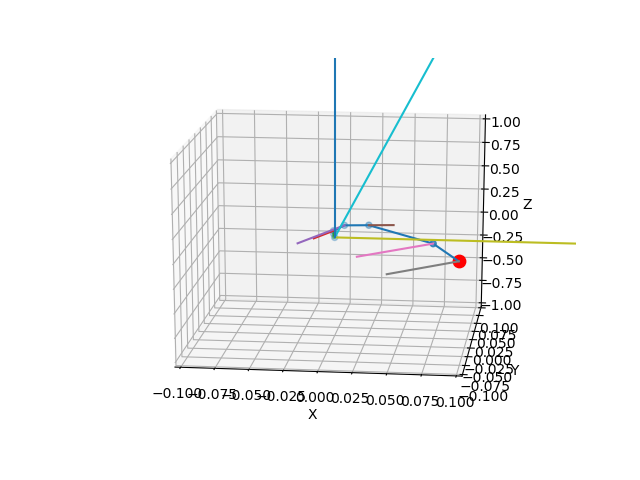

(-0.1, 0.1)

In [21]:
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_frame), ax, target=target_vector)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
# plt.zlim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/blob/master/tutorials/ikpy/getting_started.md) to understand the general concepts of the library.